# Введение

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8 рублей;
стоимость старта (начала поездки) — 
50 рублей;
с подпиской Ultra
абонентская плата — 
199 рублей в месяц;
стоимость одной минуты поездки — 
6 рублей;
стоимость старта — бесплатно.

# План работы
1) Изучение общей информации\
2) Предобработка данных\
3) Анализ данных\
4) Объединение данных\
5) Подсчёт выручки\
6) Проверка гипотез\
7) Распределения

# Описание данных

### Пользователи — `users_go.csv`
`user_id` - уникальный идентификатор пользователя\
`name` - имя пользователя\
`age` - возраст\
`city` - город\
`subscription_type`	- тип подписки (free, ultra)
### Поездки — `rides_go.csv`
`user_id` - уникальный идентификатор пользователя\
`distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)\
`duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»\
`date` - дата совершения поездки
### Подписки — `subscriptions_go.csv`
`subscription_type` - тип подписки\
`minute_price` - стоимость одной минуты поездки по данной подписке\
`start_ride_price` - стоимость начала поездки\
`subscription_fee` - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Шаг 1. Загрузка данных

In [2]:
#Считаем датафрейм users_go и изучим информацию о нём.
users = pd.read_csv('/datasets/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [5]:
users.shape

(1565, 5)

В ходе обзора данных первого датафрейма были изучены его первые строки, тип значений столбцов и количество значений в них. Пропуски в данном датафрейме отсутствуют, типы данных в столбцах указаны верно

In [6]:
#Считаем датафрейм rides_go и изучим информацию о нём.
rides = pd.read_csv('/datasets/rides_go.csv') 
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
rides.shape

(18068, 4)

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

В ходе обзора данных второго датафрейма были изучены его первые строки, тип значений столбцов и количество значений в них. Пропуски в данном датафрейме отсутствуют, типы данных указаны верно во всех столбцах, кроме столбца с датой.

In [10]:
#Считаем датафрейм subscriptions_go и изучим информацию о нём.
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [12]:
subscriptions.shape

(2, 4)

In [13]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В ходе обзора данных третьего датафрейма были изучены его первые строки, тип значений столбцов и количество значений в них. Пропуски в данном датафрейме отсутствуют, типы данных указаны верно во всех столбцах.

#### Шаг 2. Предобработка данных

In [14]:
#Проведём проверку на дубликаты в датафреймах
users.duplicated().sum()

31

In [15]:
users = users.drop_duplicates() #Удаляем дубликаты

In [16]:
rides.duplicated().sum()

0

In [17]:
subscriptions.duplicated().sum()

0

In [18]:
users.duplicated().sum()

0

In [19]:
#Приведём столбец с датой в датафрейме riders_go к нужному типу данных
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [20]:
rides['month'] = rides['date'].dt.month #Добавляем столбец с номером месяца

In [21]:
rides.info() #Проверим, внесённые изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [22]:
rides.head() 

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


В рамках данного шага была проведена проверка на дубликаты, они были только в датафрейме `users_go`, после их обнаружения они были удалены. В датафрейме `rides_go` столбец с датой был приведён к нужному типу данных, а также был добавлен столбец с месяцем.

#### Шаг 3. Исследовательский анализ данных

In [23]:
#Частота встречаемости городов
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0, 0.5, 'Город')

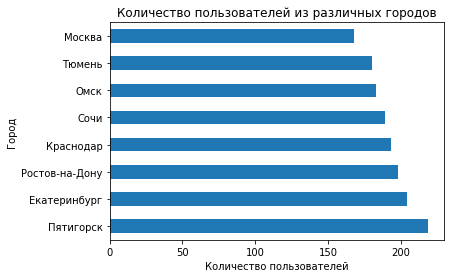

In [24]:
users['city'].value_counts().plot(x='city', y='count', kind = 'barh')
plt.title("Количество пользователей из различных городов")
plt.xlabel("Количество пользователей")
plt.ylabel("Город")

Чаще всего встречаются пользователи в Пятигорске и Екатеринбурге, реже всего в Тюмени и Москве

<AxesSubplot:title={'center':'Пользователи с подпиской и без'}, ylabel='Тип подписки'>

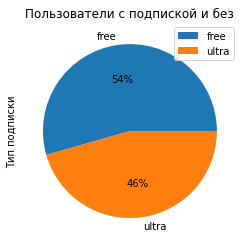

In [25]:
users['subscription_type'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Пользователи с подпиской и без', legend = True, ylabel = 'Тип подписки')

In [26]:
#Соотношение пользователей с подпиской и без
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Без подписки большее число пользователей - 835, то есть 54% от общего количества, с подпиской - 46% от общего числа пользователей (699 человек)

In [27]:
#Возраст пользователей
users['age'].describe() 

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Text(0, 0.5, 'Возраст')

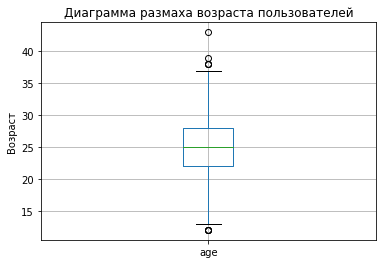

In [28]:
users.boxplot('age')
plt.title("Диаграмма размаха возраста пользователей")
plt.ylabel("Возраст")

Text(0.5, 0, 'Возраст')

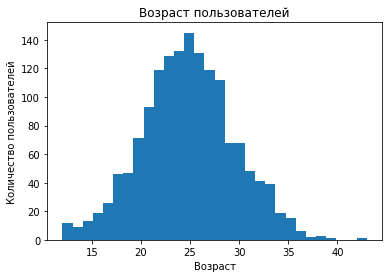

In [29]:
users['age'].plot.hist(bins = 30)
plt.title("Возраст пользователей")
plt.ylabel("Количество пользователей")
plt.xlabel("Возраст")

Средний возраст пользователей - 25 лет, минимальный возраст - 12 лет, а максимальный - 43 года.

In [30]:
#Расстояние, которое преодолевает пользователь за одну поездку
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Расстояние (м)')

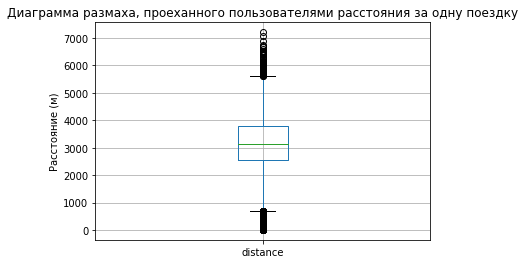

In [31]:
rides.boxplot('distance')
plt.title("Диаграмма размаха, проеханного пользователями расстояния за одну поездку")
plt.ylabel("Расстояние (м)")

In [32]:
#Удалим выбросы - поездки, менее 100 м.
rides=rides.query('distance >= 100')

In [33]:
rides['distance'].describe()

count    17990.000000
mean      3083.724675
std       1101.442969
min        102.323624
25%       2551.031541
50%       3137.750590
75%       3779.705094
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Количество поездок')

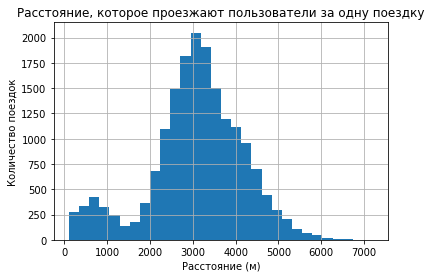

In [34]:
rides['distance'].hist(bins = 30)
plt.title("Расстояние, которое проезжают пользователи за одну поездку")
plt.xlabel("Расстояние (м)")
plt.ylabel("Количество поездок")

Среднее расстояние, преодолеваемое за поездку - 3070 м., однако на гистограмме можно наблюдать два пиковых значения, скорее всего это связанно, с разными целями для поездки, кто-то использует самокат как транспорт (добраться до дома/работы/метро), кто-то же использует его в качестве развлечения и просто катается по городу. Максимальное расстояние - 7211 м., минимальное(после удаление поездок, менее 100 м.) - 102 м.

In [35]:
#Продолжительность поездок
rides['duration'].describe()

count    17990.000000
mean        17.849271
std          6.062243
min          0.500000
25%         13.655664
50%         17.709849
75%         21.742960
max         40.823963
Name: duration, dtype: float64

Text(0, 0.5, 'Время (мин)')

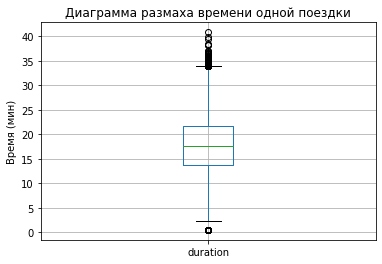

In [36]:
rides.boxplot('duration')
plt.title("Диаграмма размаха времени одной поездки")
plt.ylabel("Время (мин)")

In [37]:
#Удаляем слишком маленькие поездки 
rides=rides.query('duration >= 1')

In [38]:
rides['duration'].describe()

count    17895.000000
mean        17.941374
std          5.944696
min          2.222598
25%         13.724161
50%         17.744733
75%         21.764967
max         40.823963
Name: duration, dtype: float64

Text(0, 0.5, 'Количество поездок')

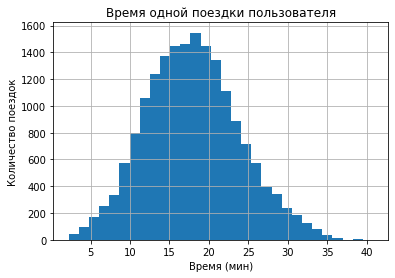

In [39]:
rides['duration'].hist(bins = 30)
plt.title("Время одной поездки пользователя")
plt.xlabel("Время (мин)")
plt.ylabel("Количество поездок")

Среднее время поездки - 17 минут, минимальное время - 2 минуты, максимальное - 41.

In [40]:
rides.shape

(17895, 5)

In [41]:
17895/18068*100

99.04250608811158

Было удалено менее 1% данных из датафрейма rides_go, что является допустимым.

#### Шаг 4. Объединение данных

In [42]:
#Объединим датафреймы в один
import numpy as np
data = users.merge(rides, on='user_id', how = 'inner')
data = data.merge(subscriptions, on='subscription_type', how='inner')
data['duration'] = np.ceil(data['duration']).astype('int')
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17890,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
17891,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
17892,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
17893,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [43]:
data.isna().sum() #Проверим таблицу на пропуски после объединения

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в новом датафрейме нет, количество строк равно количеству строк в датафрейме с поездками, значит объединение таблиц прошло успешно

In [44]:
#Создадим датафрейм только с пользователями без подписки
data_free = data.query('subscription_type == "free"')
#Создадим датафрейм только с пользователями c подпиской
data_ultra = data.query('subscription_type == "ultra"')

In [45]:
#Расстояние, которое проезжают пользователи без подписки за одну поездку
data_free['distance'].describe()

count    11395.000000
mean      3048.710848
std       1214.976625
min        102.323624
25%       2374.272932
50%       3111.679928
75%       3890.641189
max       7066.003772
Name: distance, dtype: float64

Text(0, 0.5, 'Количество поездок')

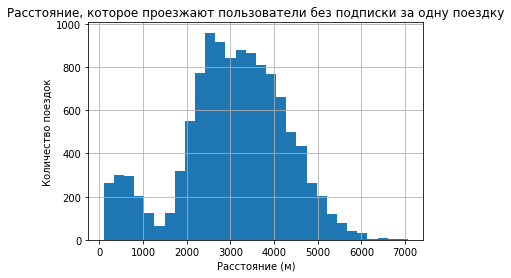

In [46]:
data_free['distance'].hist(bins = 30)
plt.title("Расстояние, которое проезжают пользователи без подписки за одну поездку")
plt.xlabel("Расстояние (м)")
plt.ylabel("Количество поездок")

In [47]:
#Расстояние, которое проезжают пользователи c подпиской за одну поездку
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Text(0, 0.5, 'Количество поездок')

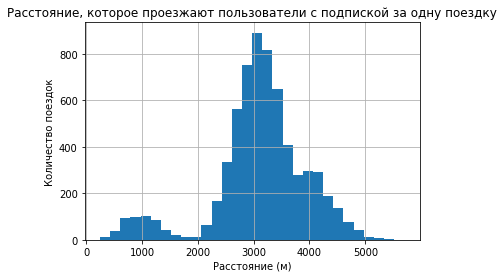

In [48]:
data_ultra['distance'].hist(bins = 30)
plt.title("Расстояние, которое проезжают пользователи с подпиской за одну поездку")
plt.xlabel("Расстояние (м)")
plt.ylabel("Количество поездок")

Среднее расстояние, которое проезжают пользователи без подписки и с ней примерно равно (в районе 3 км.)

In [49]:
#Время одной поездки, которую проезжают пользователи без подписки
data_free['duration'].describe()

count    11395.000000
mean        18.096709
std          6.128097
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

Text(0, 0.5, 'Количество поездок')

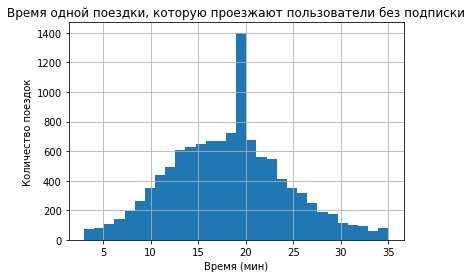

In [50]:
data_free['duration'].hist(bins = 30)
plt.title("Время одной поездки, которую проезжают пользователи без подписки")
plt.xlabel("Время (мин)")
plt.ylabel("Количество поездок")

In [51]:
#Время одной поездки, которую проезжают пользователи с подпиской
data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Text(0, 0.5, 'Количество поездок')

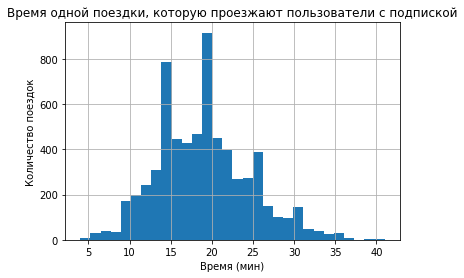

In [52]:
data_ultra['duration'].hist(bins = 30)
plt.title("Время одной поездки, которую проезжают пользователи с подпиской")
plt.xlabel("Время (мин)")
plt.ylabel("Количество поездок")

Среднее время поездки у пользователей с подпиской на 1 минуту больше, чем у пользователей без неё. Максимальное время поездки у пользователей с подпиской и без неё: 41 минута и 35 минуты соответственно.


#### Шаг 5. Подсчёт выручки

In [53]:
#Создаём новый датафрейм, где для каждого пользователя посчитаем суммарное расстояние, количество поездок и суммарное время за каждый месяц.

user_info = data.pivot_table(index = ['user_id', 'month', 'start_ride_price', 'subscription_fee', 'minute_price'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
user_info.columns = ['count', 'count_er', 'sum_distance', 'sum_duration']
user_info.drop('count_er', axis=1, inplace=True) #Удаляем повторяющийся столбец

user_info.reset_index(inplace= True, level =['start_ride_price', 'subscription_fee', 'minute_price'])
user_info.head(12)

start_ride_price  subscription_fee  minute_price  count  \
user_id month                                                            
1       1                     0               199             6      2   
        4                     0               199             6      1   
        8                     0               199             6      2   
        10                    0               199             6      2   
        11                    0               199             6      3   
        12                    0               199             6      2   
2       3                     0               199             6      3   
        4                     0               199             6      2   
        6                     0               199             6      1   
        7                     0               199             6      2   
        8                     0               199             6      1   
        10                    0               199             6      1   

               sum_distance  sum_duration  
user_id month                              
1       1       7027.511294            42  
        4        754.159807             7  
        8       6723.470560            46  
        10      5809.911100            32  
        11      7003.499363            56  
        12      6751.629942            28  
2       3      10187.723006            63  
        4       6164.381824            40  
        6       3255.338202            14  
        7       6780.722964            48  
        8        923.007439             7  
        10      2824.636598            19

In [54]:
#Добавим столбец с ежемесячной выручкой
user_info['monthly_revenue'] = user_info['count']*user_info['start_ride_price']+user_info['subscription_fee']+user_info['sum_duration']*user_info['minute_price']
user_info.head(12)

start_ride_price  subscription_fee  minute_price  count  \
user_id month                                                            
1       1                     0               199             6      2   
        4                     0               199             6      1   
        8                     0               199             6      2   
        10                    0               199             6      2   
        11                    0               199             6      3   
        12                    0               199             6      2   
2       3                     0               199             6      3   
        4                     0               199             6      2   
        6                     0               199             6      1   
        7                     0               199             6      2   
        8                     0               199             6      1   
        10                    0               199             6      1   

               sum_distance  sum_duration  monthly_revenue  
user_id month                                               
1       1       7027.511294            42              451  
        4        754.159807             7              241  
        8       6723.470560            46              475  
        10      5809.911100            32              391  
        11      7003.499363            56              535  
        12      6751.629942            28              367  
2       3      10187.723006            63              577  
        4       6164.381824            40              439  
        6       3255.338202            14              283  
        7       6780.722964            48              487  
        8        923.007439             7              241  
        10      2824.636598            19              313

#### Шаг 6. Проверка гипотез

In [57]:
#Проверим первую гипотезу: Тратят ли пользователи с подпиской больше времени на поездки?
#Гипотеза H0: Между средними значениями двух совокупностей (пользователями с подпиской и без) нет разницы, они равны
#Альтернативная: Среднее значение первой генеральной совокупности больше среднего значения второй генеральной совокупности. 
#(Пользователи с подспикой тратят больше времени на поездки)
import scipy.stats 
results = scipy.stats.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')

alpha = 0.05 #Задаём уровень статистической важности
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1333176538017645e-24
Отвергаем нулевую гипотезу.


Раз мы отвергаем нулевую гипотезу, то есть основания пологать, что пользователи с подпиской тратят больше времени на поездки.

In [58]:
#Проверим вторую гипотезу:  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
#Гипотеза H0: Среднее расстояние, которое проезжают пользователи с подпиской составляет 3130 метров
#Альтернативная: Среднее расстояние, которое проезжают пользователи с подпиской менее 3130 метров 
interested_value = 3130
results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative='less')
print(f'p-value: {results.pvalue}')
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, значит утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, менее 3130 метров нельзя.

In [59]:
#Проверим третью гипотезу:  будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
#Гипотеза H0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
#Альтернативная: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

user_info = pd.DataFrame(user_info)
monthly_revenue_ultra = user_info.loc[user_info['subscription_fee'] == 199, 'monthly_revenue']
monthly_revenue_free = user_info.loc[user_info['subscription_fee'] == 0, 'monthly_revenue']
results = scipy.stats.ttest_ind(monthly_revenue_ultra, monthly_revenue_free, alternative = 'greater')
print(f'p-value: {results.pvalue}')
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 3.4544775648938923e-31
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, значит есть основания утверждать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без неё.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотезы необходимо воспользоваться `scipy.stats.ttest_rel()`. Чтобы проверить, что количество обращений снизилось (то есть раньше их было больше), необходимо указать `alternative='greater'`

### Общий вывод
В рамках данной работы был изучен датафрейм с данными сервиса аренды самокатов GoFast. Датафреймы были проверены на пропуски, после чего из них были удалены дубликаты. После этого быда изучена и визуализированна общая информация о пользователях и поездках: частота встречаемости городов; соотношение пользователей с подпиской и без подписки; возраст пользователей; расстояние, которое пользователь преодолел за одну поездку; продолжительность поездок. Затем данные были объединены в один датфрейм и была посчитана для каждого пользователя помесячная выручка. После чего были проверены несколько гипотез:
1) Тратят ли пользователи с подпиской больше времени на поездки? - Есть основания пологать, что пользователи с подпиской тратят больше времени на поездки.\
2) Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? -  Утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, менее 3130 метров нельзя.\
3) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. - Есть основания утверждать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без неё.